In [16]:
dataset_name = "nyc_taxi_random_removal"
path = "data/" + dataset_name + ".csv"
gaussian_window_size = 1024

In [17]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import holidays
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '30min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="30min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)
print("True outlier indices: ", true_outlier_indices)

Start date:  2014-07-01 00:00:00
End date:  2015-01-31 23:30:00
Missing time stamps: 
 DatetimeIndex(['2014-07-01 10:30:00', '2014-07-11 18:00:00',
               '2014-08-03 09:30:00', '2014-10-16 17:00:00',
               '2014-10-17 00:30:00', '2014-12-06 12:30:00',
               '2014-12-06 13:00:00', '2014-12-06 13:30:00',
               '2014-12-06 14:00:00'],
              dtype='datetime64[ns]', freq=None)
Length:  10320
Time step size:  30min
Date Format:  %Y-%m-%d %H:%M:%S
True outlier indices:  [5942, 7183, 8526, 8834, 10080]


# SARIMA


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 Regression with ARIMA(0,1,0) errors : 26946.54
 Regression with ARIMA(1,1,0) errors : 26377.75
 ARIMA(0,1,1) with drift         : Inf
 ARIMA(0,1,0)                    : 26944.45
 Regression with ARIMA(2,1,0) errors : 26360.3
 Regression with ARIMA(3,1,0) errors : 26351.57
 Regression with ARIMA(4,1,0) errors : 26355.81
 ARIMA(3,1,1) with drift         : Inf
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(4,1,1) with drift         : Inf
 ARIMA(3,1,0)                    : 26349.47
 ARIMA(2,1,0)                    : 26358.06
 ARIMA(4,1,0)                    : 26346.28
 ARIMA(5,1,0)                    : Inf
 ARIMA(4,1,1)                    : Inf
 ARIMA(3,1,1)                    : Inf
 ARIMA(5,1,1)                    : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(4,1,0)                    : 26328.39

 Best model: Regression with ARIMA(4,1,0) errors 



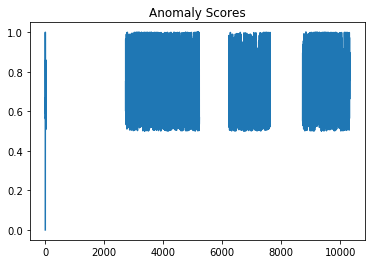

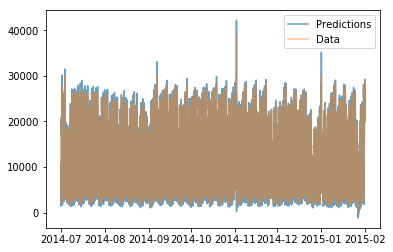

Time:  32.73377728462219


['anomaly_scores/SARIMA_auto/nyc_taxi_random_removal_random_removal']

In [4]:
save_path = "anomaly_scores/SARIMA_auto/" + dataset_name+ "_random_removal"
output_dict = ad.sarimax(gaussian_window_size=gaussian_window_size, step_size=100, auto=True,
                         use_exog=True, s=48, plot_anomaly_scores=True,plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# Prophet

In [5]:
step_sizes = [100, 200]
seasonality_prior_scales = [1, 5, 10, 15, 20]
seasonality_modes = ["additive", "multiplicative"]
changepoint_prior_scales = [.01, .05, .1, .15, .2]
opt_dict = {}

for step_size in step_sizes:
    for seasonality_prior_scale in seasonality_prior_scales:
        for seasonality_mode in seasonality_modes:
            for changepoint_prior_scale in changepoint_prior_scales:
                
                mse = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                          daily_seasonality=True, 
                                          seasonality_prior_scale=seasonality_prior_scale,
                                          seasonality_mode=seasonality_mode,
                                          changepoint_prior_scale=changepoint_prior_scale,
                                          step_size=step_size,
                                          optimize=True)
                print("Step Size: ", step_size)
                print("Seasonality Prior Scale: ", seasonality_prior_scale)
                print("Seasonality Mode: ", seasonality_mode)
                print("Changepoint Prior Scale: ", changepoint_prior_scale)
                print("MSE: ",mse)
                
                key_str = "Step Size " + str(step_size) + " Seasonality Prior Scale " + str(seasonality_prior_scale) +" Seasonality Mode " + str(seasonality_mode) +" Changepoint Prior Scale" + str(changepoint_prior_scale)
                
                opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11385084.829977958


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11286134.782780295


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11300418.947228499


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11308701.023203362


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11301248.528467696


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11372068.577821713


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11310593.661452474


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349873.275228402


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11342814.05907891


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335078.747143112


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11375165.145436868


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287073.820842637


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11302143.335349873


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11303351.676981729


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11301750.710137052


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11378313.804661442


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11313090.401522236


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345041.360684706


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11342831.77872664


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11336169.832183674


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11374845.925364463


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11289560.945373692


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303345.973274415


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11306228.983362649


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11303957.588834183


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11368066.94299589


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316107.999123204


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11343766.693686249


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11347654.991207091


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335467.049343491


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11372021.121368127


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287506.409127783


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11299085.6207632


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307949.77422518


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11296607.87923387


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11384175.038431333


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11312933.426630674


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349569.653809067


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11324874.241393289


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335034.748973532


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11372520.47405343


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287326.437054487


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11302860.180524763


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11305295.894759856


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11298501.550560627


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11373634.368625721


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11311298.59157389


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345634.162575


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11345141.887666244


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11332167.71092829


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11385084.829977958


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11286134.782780295


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11300418.947228499


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11308701.023203362


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11301248.528467696


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11372068.577821713


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11310593.661452474


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349873.275228402


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11342814.05907891


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335078.747143112


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11375165.145436868


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287073.820842637


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11302143.335349873


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11303351.676981729


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11301750.710137052


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11378313.804661442


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11313090.401522236


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345041.360684706


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11342831.77872664


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11336169.832183674


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11374845.925364463


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11289560.945373692


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303345.973274415


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11306228.983362649


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11303957.588834183


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11368066.94299589


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316107.999123204


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11343766.693686249


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11347654.991207091


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335467.049343491


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11372021.121368127


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287506.409127783


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11299085.6207632


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307949.77422518


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11296607.87923387


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11384175.038431333


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11312933.426630674


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349569.653809067


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11324874.241393289


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11335034.748973532


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11372520.47405343


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11287326.437054487


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11302860.180524763


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11305295.894759856


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11298501.550560627


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11373634.368625721


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11311298.59157389


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345634.162575


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11345141.887666244
Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11332167.71092829

best params:  Step Size 100 Seasonality Prior Scale 1 Seasonality Mode additive Changepoint Prior Scale0.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


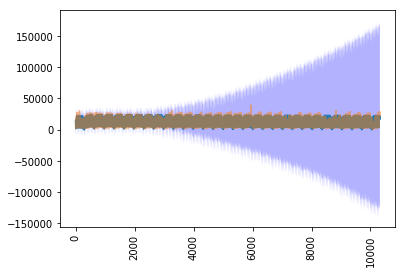

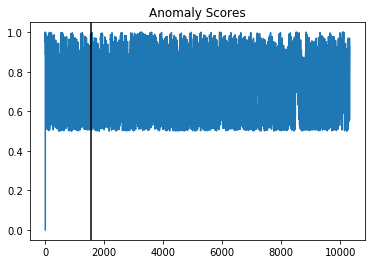

Time:  29.245028734207153


['anomaly_scores/Prophet/nyc_taxi_random_removal_random_removal']

In [6]:
save_path = "anomaly_scores/Prophet/" + dataset_name+ "_random_removal"
output_dict = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                  daily_seasonality=True, 
                                  seasonality_prior_scale=1,
                                  seasonality_mode="additive",
                                  changepoint_prior_scale=.05,
                                  step_size=100,
                                  plot_forecast=True,
                                  plot_anomaly_score=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# STL Resid

In [7]:
# optimization step
swindows = ["periodic", 5,7,9,11]
sdegrees = [0,1,2]
twindows = [5,7,9,11]
tdegrees = [0,1,2]
inners = [1,2,3]
outers = [0,1]
opt_dict = {}

for swindow in swindows:
    for sdegree in sdegrees:
        for twindow in twindows:
            for tdegree in tdegrees:
                for inner in inners:
                    for outer in outers:
                        
                        print("swindow: ", swindow)
                        print("sdegree: ", sdegree)
                        print("twindow: ", twindow)
                        print("tdegree: ", tdegree)
                        print("inner: ", inner)
                        print("outer: ", outer)
                        
                        
                        try:
  
                            stl_resid_sum = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=48, swindow=swindow, 
                                                         sdegree=sdegree, twindow=twindow, tdegree=tdegree, inner=inner, 
                                                         outer=outer, fill_option="linear", optimize=True)


                            print("STL Resid Sum: ",stl_resid_sum)

                            key_str = "swindow " + str(swindow) + " sdegree " + str(sdegree) +" twindow " + str(twindow) +" tdegree " + str(tdegree) +" inner " + str(inner) +" outer " + str(outer)

                            opt_dict[key_str] = stl_resid_sum

                        except:
                            print("Fail")
                            continue

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161322220.65977532
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161615300.22191134
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161275647.57020667
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161322220.65977532
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161258155.3374208
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161290774.18563294

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  176466053.24015793
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  176114960.63989726
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  176127941.65212926
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  176114103.47974545
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  176117430.4837488
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  779759646.3462601
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  1
154

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  290109179.3487739
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  290087314.2904335
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  290093202.77303535
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  108638363.9725942
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  108843295.53430657
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  108621362.07752474
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  2
outer:  1
1548
R

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161290774.18563294
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  157911237.60246533
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  158181419.3155941
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  157894116.9422254
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  157911237.60246533
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  157892141.92187053
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  3
outer:  1
1548


R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  780772562.8397515
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  779491853.8204771
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  779759646.3462601
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  779402367.7796525
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  779586281.3850416
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  643539303.4134616
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  1
inner:  1
outer:  1
154

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  54597505.96193695
swindow:  5
sdegree:  0
twindow:  7
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  54790533.79064976
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  217269881.38871574
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  201771444.6510262
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  232829016.21357873
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  217269881.38871574
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fi

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  74103.5111593248
swindow:  5
sdegree:  1
twindow:  5
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  71299.60966829945
swindow:  5
sdegree:  1
twindow:  5
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  60657.08399179945
swindow:  5
sdegree:  1
twindow:  5
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  77673.80229878711
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  129988192.41101691
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  124066543.54588276
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  122341795.82054947
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  120578031.80931915
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  123903731.38136251
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  122341795.82054947
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  124433775.5581803
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  123382250.06477173
swindow:  5
sdegree:  2
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. 

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  20080370.635712914
swindow:  5
sdegree:  2
twindow:  9
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  19911713.650093973
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  13277954.375975607
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  13763868.33693154
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  13553752.776026033
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  13277954.375975607
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will 

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  202107580.46346545
swindow:  7
sdegree:  0
twindow:  7
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  194044439.87512887
swindow:  7
sdegree:  0
twindow:  7
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  204230500.22699308
swindow:  7
sdegree:  0
twindow:  7
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  199356617.5669845
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  75416468.02024688
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  77520770.68742351
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fi

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  101506479.81735687
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  99251835.50038266
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  104153968.94982474
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  101506479.81735687
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  104822902.5409232
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  103307882.17744741
swindow:  7
sdegree:  1
twindow:  5
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will f

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  442453375.4863096
swindow:  7
sdegree:  1
twindow:  11
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  422380064.81711674
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  355593770.123265
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  323817014.9791854
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  381737578.46277994
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  355593770.123265
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  159426353.5958113
swindow:  7
sdegree:  2
twindow:  9
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  154285430.24385434
swindow:  7
sdegree:  2
twindow:  9
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  161077791.54777586
swindow:  7
sdegree:  2
twindow:  9
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  157832491.4468233
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  153967799.6409649
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  150720797.99120167
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fi

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  238448544.251609
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  232273036.73021397
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  241524266.47780347
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  238448544.251609
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  241575393.14218682
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  241011577.73334444
swindow:  9
sdegree:  0
twindow:  7
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fil

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  203863102.48752844
swindow:  9
sdegree:  0
twindow:  11
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  203427412.71811616
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  122098211.8419757
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  120225113.57116616
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  123297919.61836642
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  122098211.8419757
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will 

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  133557728.70852794
swindow:  9
sdegree:  1
twindow:  9
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  133698441.22772479
swindow:  9
sdegree:  1
twindow:  9
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  133522957.9060308
swindow:  9
sdegree:  1
twindow:  9
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  133617730.21785581
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  530381488.7424099
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  485793097.96068686
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. wil

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  59002862.09708753
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  60725706.82129331
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  59413273.56121611
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  59002862.09708753
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  59557581.7393091
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  59286922.84065512
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. 

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  135734659.79024422
swindow:  11
sdegree:  0
twindow:  5
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  135544280.73163217
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  272515.7345479846
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  388945.4535983285
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  181912.54558983256
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  272515.7345479846
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. w

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  557861099.9598448
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  554655737.7939782
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  558060962.7640818
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  557399466.1473142
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  218451777.5967096
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  218153124.41411543
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548  missin

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  387190917.4588253
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  368302239.84643024
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  356223330.8851205
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  371703174.48130953
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  368302239.84643024
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  371992689.618243
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. wi

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  190143984.1641259
swindow:  11
sdegree:  2
twindow:  7
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  183490952.37096187
swindow:  11
sdegree:  2
twindow:  7
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  191946992.26036564
swindow:  11
sdegree:  2
twindow:  7
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  187811631.02289122
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  181336191.18506432
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  179551799.7037809
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548  missing. 

R stlplus completed: 1548  missing. will fill. True
STL Resid Sum:  167270309.48334998

best params:  swindow 5 sdegree 2 twindow 5 tdegree 2 inner 3 outer 0


In [8]:
save_path = "anomaly_scores/stl/" + dataset_name+ "_random_removal"
output_dict = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=48, swindow=5, 
             sdegree=2, twindow=5, tdegree=2, inner=3, 
             outer=0, fill_option="linear", optimize=False)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

10320
R stlplus completed: 10320  missing. will fill. True
Time:  1.4998095035552979


['anomaly_scores/stl/nyc_taxi_random_removal_random_removal']

# GLM

In [19]:
# optimize
etas = [.5,1]
lambdas = [.99, .999, .9999]

opt_dict = {}

for eta in etas:
    for lambda_ in lambdas:
       
        mse = ad.glm(gaussian_window_size=gaussian_window_size, 
                     family='poisson', 
                     eta=eta, 
                     lambda_=lambda_)["MSE"]

        print("eta: ", eta)
        print("lambda: ", lambda_)
        print("MSE: ",mse)

        key_str = "eta " + str(eta) + " lambda " + str(lambda_)

        opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

 21%|██▏       | 2198/10311 [00:00<00:00, 21973.37it/s]

Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


 23%|██▎       | 2412/10311 [00:00<00:00, 24113.53it/s]

eta:  0.5
lambda:  0.99
MSE:  inf
Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


 23%|██▎       | 2325/10311 [00:00<00:00, 23245.20it/s]

eta:  0.5
lambda:  0.999
MSE:  17559887.90784323
Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


 23%|██▎       | 2393/10311 [00:00<00:00, 23923.86it/s]

eta:  0.5
lambda:  0.9999
MSE:  24125284.373074535
Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


 22%|██▏       | 2271/10311 [00:00<00:00, 22705.58it/s]

eta:  1
lambda:  0.99
MSE:  17406394.286135852
Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


 22%|██▏       | 2319/10311 [00:00<00:00, 23186.59it/s]

eta:  1
lambda:  0.999
MSE:  15777704.242746735
Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


100%|██████████| 10311/10311 [00:00<00:00, 23605.99it/s]


eta:  1
lambda:  0.9999
MSE:  20265747.44002568

best params:  eta 1 lambda 0.999


 23%|██▎       | 2356/10311 [00:00<00:00, 23555.92it/s]

Initial Mean 15005.67764857881
Initial StdDev 6718.525444720388


100%|██████████| 10311/10311 [00:00<00:00, 23400.25it/s]


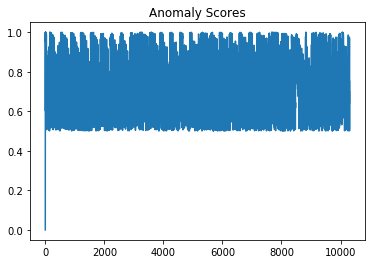

Time:  1.774334192276001


['anomaly_scores/GLM/nyc_taxi_random_removal_random_removal']

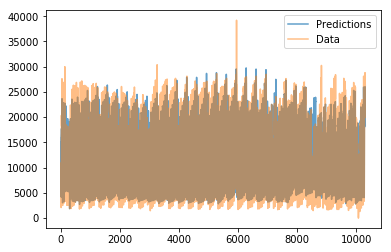

In [20]:
save_path = "anomaly_scores/GLM/" + dataset_name+ "_random_removal"
output_dict = ad.glm(gaussian_window_size=gaussian_window_size, family='poisson', 
                     eta=1, lambda_=0.999,plot_anomaly_scores=True, plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)